# Méthode des moindres carrés

La méthode des moindres carrés, indépendamment élaborée par Legendre et Gauss au début du XIXe siècle, permet de comparer des données expérimentales, généralement entachées d’erreurs de mesure, à un modèle mathématique censé décrire ces données. 

* Régression linéaire : 
l'utilisation de la régression linéaire se rencontre par exemple lorsque l'on veut étalonner un appareil de mesure simple dont la loi de comportement est linéaire.

On veut minimiser la variance par rapport à a et b :
$$ \sigma^2 =\sum_{i=0}^{N-1} (y_i-a x_i -b)^2$$

En notant  $u=\left(
\begin{array}{c}
a \\ b
\end{array}
\right)
$
et $y=\left(
\begin{array}{c c}
y_{0} \\
y_{1} \\
\vdots\\
y_{N-1} \\
\end{array}
\right)
$
et en introduisant $A=\left(
\begin{array}{c c}
x_{0}   & 1  \\
x_{1}   & 1  \\
\vdots  & \vdots \\
x_{N-1}   & 1  \\
\end{array}
\right)$

La variance s'écrit : $ (u^t A^t -b) (b-A u) $. La minimisation de la variation par rapport à $u$ donne :
$\delta u^t A^t (b-Au) =0 $. 

La variable $u$ doit vérifier le système d'équations linéaires :
$A^t A u = A^t b$





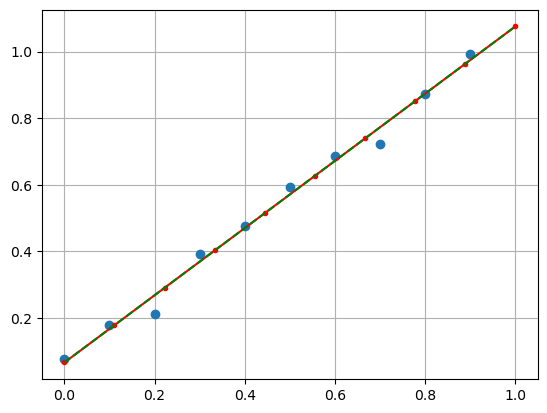

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

# modèle linéaire
def model(x, a, b):
    return a * x + b

# Résidus
def residus(params, x, y):
    return y - model(x, *params) # second argument unpacking

x=np.linspace(0, 1, 10, endpoint=False) 
y=x.copy()+np.random.rand(x.shape[0])*0.1

plt.figure()
plt.plot(x, y, 'o')
guest=(0, 0)

# slicing [:2] sur le résultat complet pour ne retenir que les coeffs et la matrice de covariance
coeff, pcov = optimize.leastsq(residus, guest, args=(x, y), full_output=True)[:2]
xfit=np.linspace(0, 1, 10, endpoint=True) 
yfit = model(xfit, *coeff)
plt.plot(xfit, yfit, 'r.-')

# Approche implementation moindre carrée sous forme syslin
un=np.ones_like(x)
A=np.vstack((x, un))

R=A.dot(A.T)
#print(R.shape)
b=A.dot(y)

#print(R, ' ', type(R))
#print(b, ' ', type(b), ' ', b.shape)
coeff=np.linalg.solve(R, b)
yfit2=coeff[0]*xfit+coeff[1]
plt.plot(xfit, yfit2, 'g--')
plt.grid()
plt.show()

# Modèle générale d'ajustement
On suppose que les données $y_i$ suivent un modèle :

$$
y_i = f(x_i, \boldsymbol{p}) + \varepsilon_i
$$

où :
- $x_i$ sont les points d'entrée,
- $\boldsymbol{p} = [p_0, \ldots, p_{m-1}]^T$ est le vecteur des paramètres à estimer,
- $\varepsilon_i$ sont des erreurs aléatoires indépendantes, de moyenne nulle et de variance $\sigma^2$.

### Matrice Jacobienne

Soit $r_i(\boldsymbol{p}) = y_i - f(x_i, \boldsymbol{p})$ le $i$-ième résidu.

La matrice Jacobienne $\mathbf{J}$ est définie par :

$$
\mathbf{J}_{ij} = \frac{\partial r_i}{\partial p_j}
\quad \Rightarrow \quad
\mathbf{J} = 
\begin{bmatrix}
\frac{\partial r_0}{\partial p_0} & \cdots & \frac{\partial r_0}{\partial p_{m-1}} \\
\vdots & \ddots & \vdots \\
\frac{\partial r_{n-1}}{\partial p_0} & \cdots & \frac{\partial r_{n-1}}{\partial p_{m-1}}
\end{bmatrix}
\in \mathbb{R}^{n \times m}
$$

Dans le cas d'un ajustement linéaire :
$$
\mathbf{J} = 
\begin{bmatrix}
\frac{\partial r_0}{\partial a} & \frac{\partial r_0}{\partial b} \\
\frac{\partial r_1}{\partial a} & \frac{\partial r_1}{\partial b} \\
\vdots & \vdots \\
\frac{\partial r_{n-1}}{\partial a} & \frac{\partial r_{n-1}}{\partial b}
\end{bmatrix}
=
\begin{bmatrix}
- x_0 & -1 \\
- x_1 & -1 \\
\vdots & \vdots \\
- x_{n-1} & -1
\end{bmatrix}
$$

### Matrice de covariance non corrigée

La fonction __scipy.optimize.leastsq__ retourne une estimation de la matrice de covariance des paramètres ajustés donnée par :

$$
\text{pcov} \approx (\mathbf{J}^T \mathbf{J})^{-1}
$$

Cette estimation suppose que $\sigma^2 = 1$, c’est-à-dire que la variance des erreurs est inconnue et non prise en compte.

### Estimation de la variance résiduelle

En pratique, on estime la variance des erreurs par la variance résiduelle :

$$
\hat{\sigma}^2 = \frac{1}{n - m} \sum_{i=0}^{n-1} \left( y_i - f(x_i, \hat{\boldsymbol{p}}) \right)^2
$$

où $n$ est le nombre de points de données et $m$ le nombre de paramètres ajustés.

### Matrice de covariance corrigée

La matrice de covariance corrigée est alors donnée par :

$$
\text{pcov}_{\text{corrigée}} = \hat{\sigma}^2 \cdot (\mathbf{J}^T \mathbf{J})^{-1}
$$

C'est cette matrice qu’il faut utiliser pour estimer les incertitudes sur les paramètres ajustés.

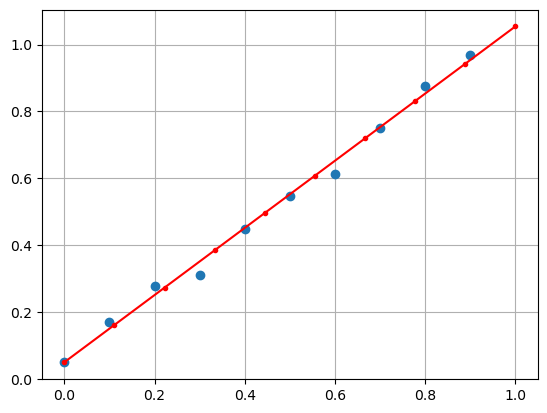

pcov          :  [[ 1.21212143 -0.54545463]
 [-0.54545463  0.34545457]]
pcov corrigée :  [[ 0.00076276 -0.00034324]
 [-0.00034324  0.00021739]]
a = 1.0036 ± 0.0276
b = 0.0504 ± 0.0147


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

# modèle linéaire
def model(x, a, b):
    return a * x + b

# Résidus
def residus(params, x, y):
    return y - model(x, *params) # second argument unpacking

x=np.linspace(0, 1, 10, endpoint=False) 
y=x.copy()+np.random.rand(x.shape[0])*0.1

plt.figure()
plt.plot(x, y, 'o')
guest=(0, 0)

# slicing [:2] sur le résultat complet pour ne retenir que les coeffs et la matrice de covariance
coeff, pcov = optimize.leastsq(residus, guest, args=(x, y), full_output=True)[:2]
xfit=np.linspace(0, 1, 10, endpoint=True) 
yfit = model(xfit, *coeff)
plt.plot(xfit, yfit, 'r.-')
plt.grid()
plt.show()

# Correction de la matrice de covariance
res = residus(coeff, x, y)
dof = len(x) - len(coeff)
res_var = np.sum(res**2) / dof
pcov_corr = pcov * res_var
print('pcov          : ', pcov)
print('pcov corrigée : ', pcov_corr)

# erreurs sur a et b
sigma_a = np.sqrt(pcov_corr[0, 0])
sigma_b = np.sqrt(pcov_corr[1, 1])

print("a = {:.4f} ± {:.4f}".format(coeff[0], sigma_a))
print("b = {:.4f} ± {:.4f}".format(coeff[1], sigma_b))

# ajustement gaussien

On désire ajuster un ensemble de points expérimentaux avec un

[9.99660453 0.98754505]
[[0.00405972 0.00053474]
 [0.00053474 0.0002113 ]]
pcov          :  [[0.00405972 0.00053474]
 [0.00053474 0.0002113 ]]
pcov corrigée :  [[2.30278189 0.30331646]
 [0.30331646 0.11985617]]
a = 9.9966 ± 1.5175
b = 0.9875 ± 0.3462


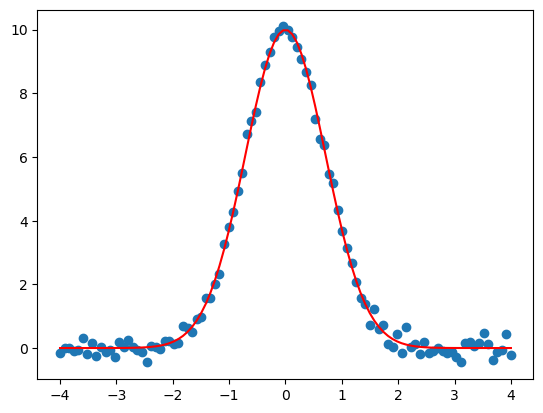

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func(x, a, b):
    return a * np.exp(-b * x**2)

rng = np.random.default_rng()

x = np.linspace(-4, 4, 100)
ynoise = 0.2 * rng.normal(size=x.size)
y = 10*np.exp(-x**2) + ynoise

coeff, pcov = curve_fit(func, x, y)
print(coeff)
print(pcov)

plt.figure()
plt.plot(x, y, 'o')

xfit=x;
yfit=func(xfit, *coeff)
plt.plot(xfit, yfit, 'r-')

# Correction de la matrice de covariance
res = residus(coeff, x, y)
dof = len(x) - len(coeff)
res_var = np.sum(res**2) / dof
pcov_corr = pcov * res_var
print('pcov          : ', pcov)
print('pcov corrigée : ', pcov_corr)

# erreurs sur a et b
sigma_a = np.sqrt(pcov_corr[0, 0])
sigma_b = np.sqrt(pcov_corr[1, 1])

print("a = {:.4f} ± {:.4f}".format(coeff[0], sigma_a))
print("b = {:.4f} ± {:.4f}".format(coeff[1], sigma_b))